In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

d:\Users\Public\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [4]:
df =pd.read_csv('d:heart.csv')

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# uniqueness

for column in df.columns:
    distinct_value=len(df[column].unique())
    print(f"{column}:{distinct_value} distinct values")

age:41 distinct values
sex:2 distinct values
cp:4 distinct values
trtbps:49 distinct values
chol:152 distinct values
fbs:2 distinct values
restecg:3 distinct values
thalachh:91 distinct values
exng:2 distinct values
oldpeak:40 distinct values
slp:3 distinct values
caa:5 distinct values
thall:4 distinct values
output:2 distinct values


In [10]:
duplicate_data=df[df.duplicated()]
print("no. of duplicate rows : ", duplicate_data)

no. of duplicate rows :       age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(302, 14)

## univariate analysis

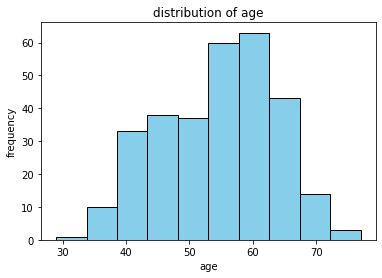

In [13]:
plt.hist(df['age'] , bins=10,color='skyblue',edgecolor='black')
plt.title('distribution of age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

d:\Users\Public\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

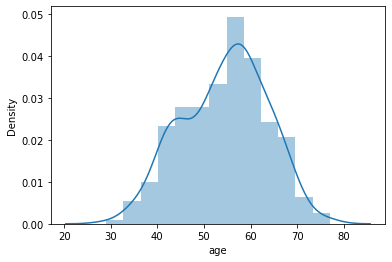

In [14]:
sns.distplot(df['age'])

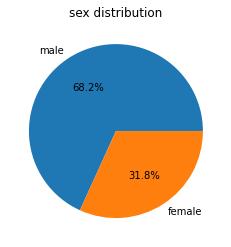

In [15]:
sex_count= df['sex'].value_counts()
plt.pie(sex_count,labels=['male','female'],autopct='%1.1f%%')
plt.title('sex distribution')
plt.show()

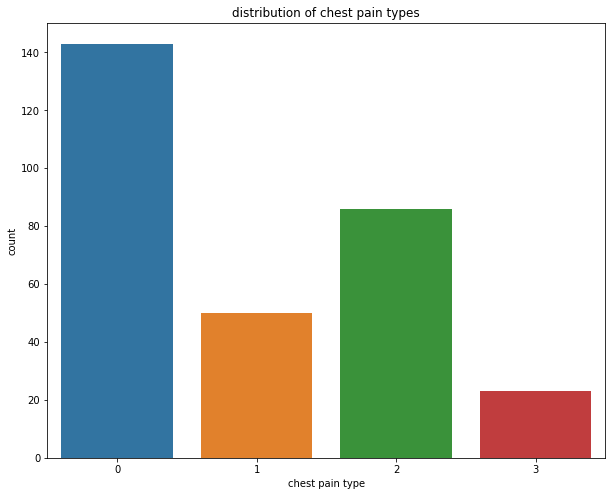

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='cp',data=df)
plt.title('distribution of chest pain types')
plt.ylabel('count')
plt.xlabel('chest pain type')
plt.show()

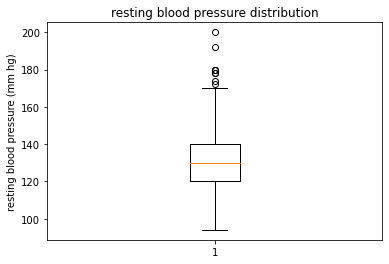

In [17]:
plt.boxplot(df['trtbps'])
plt.title('resting blood pressure distribution')
plt.ylabel('resting blood pressure (mm hg)')
plt.show()

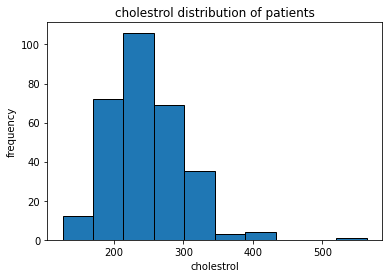

In [18]:
plt.hist(df['chol'],bins=10,edgecolor='black')
plt.title('cholestrol distribution of patients')
plt.xlabel('cholestrol')
plt.ylabel('frequency')
plt.show()

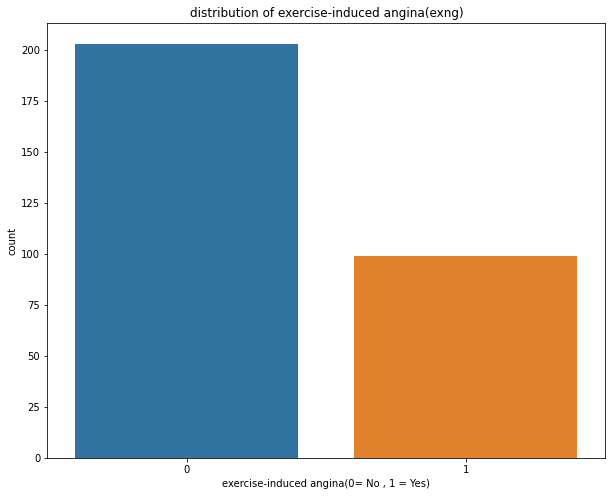

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='exng',data=df)
plt.xlabel('exercise-induced angina(0= No , 1 = Yes)')
plt.ylabel('count')
plt.title('distribution of exercise-induced angina(exng)')
plt.show()

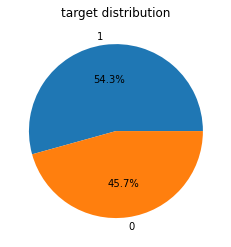

In [20]:
target_count=df['output'].value_counts()
plt.pie(target_count,labels=target_count.index,autopct='%1.1f%%')
plt.title('target distribution')
plt.show()

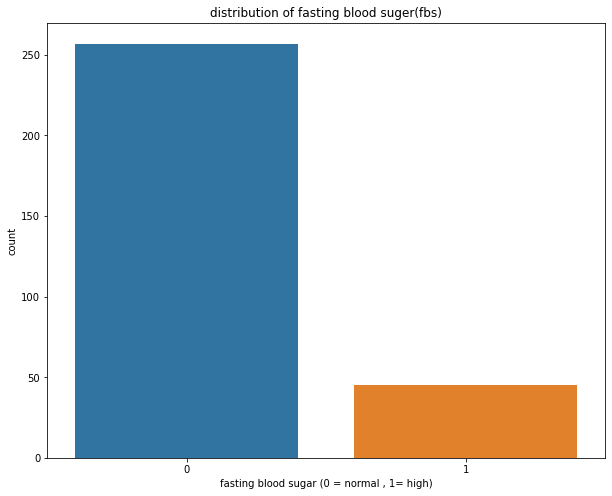

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x='fbs',data=df)
plt.title('distribution of fasting blood suger(fbs)')
plt.xlabel('fasting blood sugar (0 = normal , 1= high)')
plt.ylabel('count')
plt.show()

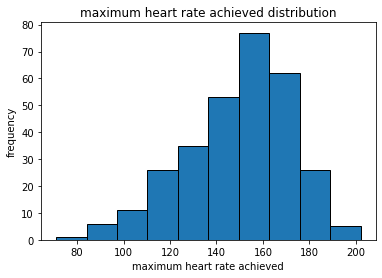

In [22]:
plt.hist(df['thalachh'],bins=10,edgecolor='black')
plt.title('maximum heart rate achieved distribution')
plt.xlabel('maximum heart rate achieved')
plt.ylabel('frequency')
plt.show()

## bivariate analysis

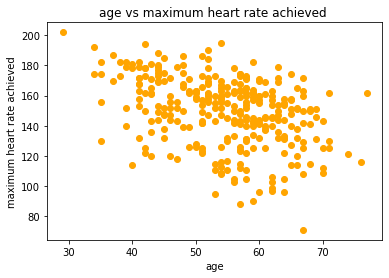

In [23]:
plt.scatter(df['age'],df['thalachh'],color='orange')
plt.title('age vs maximum heart rate achieved ')
plt.xlabel('age')
plt.ylabel('maximum heart rate achieved')
plt.show()

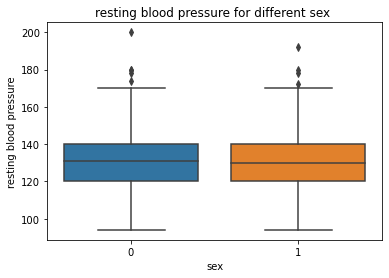

In [24]:
sns.boxplot(x='sex',y='trtbps',data=df)
plt.title('resting blood pressure for different sex ')
plt.xlabel('sex')
plt.ylabel('resting blood pressure')
plt.show()

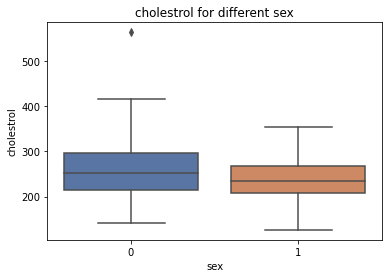

In [25]:
sns.boxplot(x='sex',y='chol',data=df,palette='deep')
plt.title('cholestrol for different sex')
plt.xlabel('sex')
plt.ylabel('cholestrol')
plt.show()

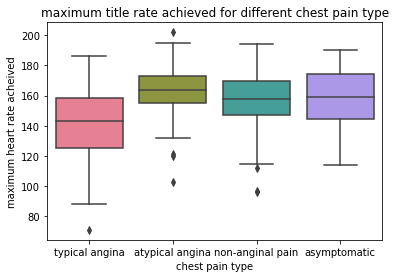

In [26]:
sns.boxplot(x='cp',y='thalachh',data=df,palette='husl')
plt.title('maximum title rate achieved for different chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('maximum heart rate acheived')
plt.xticks(ticks=[0,1,2,3],labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

## Multivariate analysis

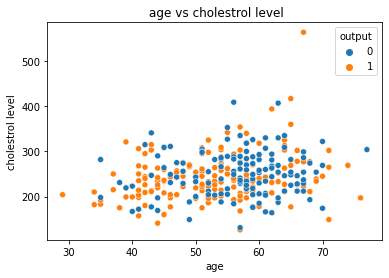

In [28]:
sns.scatterplot(x='age',y='chol',hue='output',data=df)
plt.title(' age vs cholestrol level')
plt.xlabel('age')
plt.ylabel('cholestrol level')
plt.show()

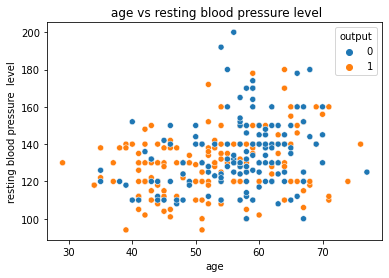

In [29]:
sns.scatterplot(x='age',y='trtbps',hue='output',data=df)
plt.title(' age vs resting blood pressure level')
plt.xlabel('age')
plt.ylabel('resting blood pressure  level')
plt.show()

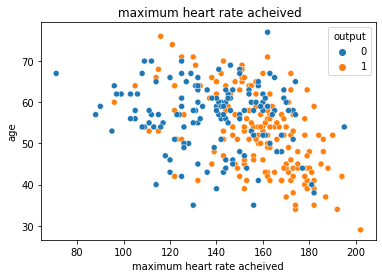

In [32]:
sns.scatterplot(y='age',x='thalachh',hue='output',data=df)
plt.title(' maximum heart rate acheived')
plt.ylabel('age')
plt.xlabel('maximum heart rate acheived')
plt.show()

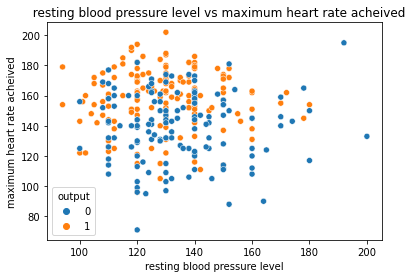

In [33]:
sns.scatterplot(y='thalachh',x='trtbps',hue='output',data=df)
plt.title('  resting blood pressure level vs maximum heart rate acheived')
plt.xlabel('resting blood pressure level')
plt.ylabel('maximum heart rate acheived')
plt.show()

## working with categorical and numerical columns

In [34]:
categorical_columns=['sex','cp','restecg','slp','thall']
numerical_columns=['age','trtbps','chol','fbs','thalachh','exng','caa','output']
dummy_variables=pd.get_dummies(df,columns=categorical_columns,drop_first=False)

In [35]:
dummy_variables

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,sex_0,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,145,233,1,150,0,2.3,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,0,187,0,3.5,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,0,172,0,1.4,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,0,178,0,0.8,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,0,163,1,0.6,0,1,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,1,0.2,0,0,1,...,0,1,0,0,1,0,0,0,0,1
299,45,110,264,0,132,0,1.2,0,0,0,...,0,1,0,0,1,0,0,0,0,1
300,68,144,193,1,141,0,3.4,2,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,0,115,1,1.2,1,0,0,...,0,1,0,0,1,0,0,0,0,1


## preprocessing and scaling the data

In [36]:
scaler = StandardScaler()
scaled_numerical=scaler.fit_transform(df[numerical_columns])

In [37]:
scaled_numerical_df=pd.DataFrame(scaled_numerical,columns=numerical_columns)

In [38]:
scaled_numerical_df

,age,trtbps,chol,fbs,thalachh,exng,caa,output
0,0.949794,0.764066,-0.261285,2.389793,0.018826,-0.698344,-0.714911,0.917313
1,-1.928548,-0.091401,0.067741,-0.418446,1.636979,-0.698344,-0.714911,0.917313
2,-1.485726,-0.091401,-0.822564,-0.418446,0.980971,-0.698344,-0.714911,0.917313
3,0.174856,-0.661712,-0.203222,-0.418446,1.243374,-0.698344,-0.714911,0.917313
4,0.285561,-0.661712,2.080602,-0.418446,0.587366,1.431958,-0.714911,0.917313
...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-0.418446,-1.161988,1.431958,-0.714911,-1.090140
298,-1.042904,-1.232023,0.338703,-0.418446,-0.768384,-0.698344,-0.714911,-1.090140
299,1.503322,0.707035,-1.035462,2.389793,-0.374779,-0.698344,1.274980,-1.090140
300,0.285561,-0.091401,-2.235438,-0.418446,-1.511859,1.431958,0.280034,-1.090140


In [40]:
## drop the original numerical columns
dummy_variables=dummy_variables.drop(numerical_columns,axis=1)

In [41]:
# concatenate the dummy variable and scaled numerical columns
processed_df=pd.concat([dummy_variables,scaled_numerical_df],axis=1)

## correlation matrix with dummy variables

In [42]:
correlation_matrix=processed_df.corr()

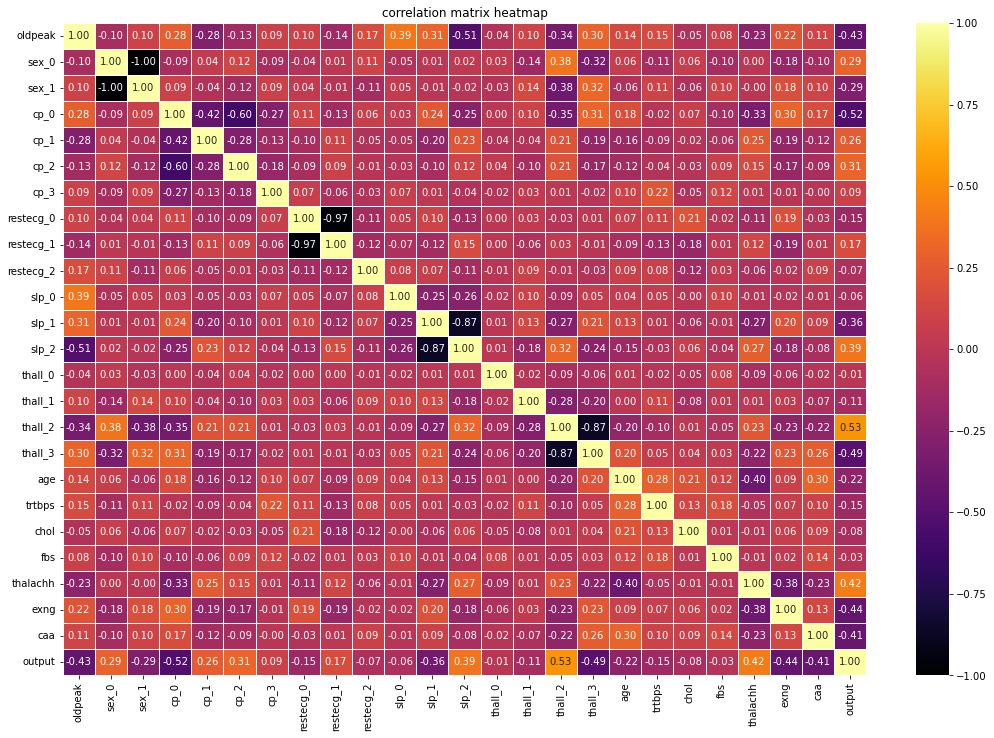

In [44]:
# graph1
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix,annot=True,cmap='inferno',linewidth=0.5,fmt='.2f')
plt.title('correlation matrix heatmap')
plt.show()

In [45]:
corr=processed_df.corr()
target_corr=corr['output'].drop('output')

# sort correlation values in descending order
target_corr_sorted=target_corr.sort_values(ascending=False)

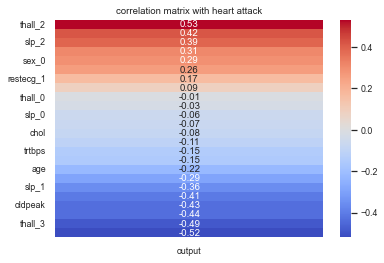

In [48]:
# graph 2 

sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_palette('dark')
sns.heatmap(target_corr_sorted.to_frame(),cmap='coolwarm',annot=True,fmt='.2f')
plt.title('correlation matrix with heart attack')
plt.show()